In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
from pyforbes import ForbesList
import hvplot.pandas
pn.extension('tabulator')

In [26]:
flist = ForbesList()
years = []
df = pd.DataFrame()
for i in range(1997, 2023):
    years.append(i)
df["year"] = years

#Fill any empty values in the dataframe as 0

In [27]:
#richest400_df = richest400_df.fillna(0)

Create an array to keep track of the total number of billionaires each year

In [28]:
number_billionaires = []
for i in range(1997,2023):
    number_df = flist.get_df("billionaires", year =i)
    number_billionaires.append(number_df.shape[0])
df["Total Billionaires"] = number_billionaires

Enable the DataFrame to be interactive

In [29]:
idf = df.interactive()

Create the year slider widget

In [30]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=1997, end=2022, step=1, value=2000)

Setting up pipeline for total billionaires (Not fixed yet)

In [31]:
total_pipeline = (
    idf[
        idf.year <= year_slider
    ]
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

Creating plot for total billionaires using hvplot (Not working)

In [32]:
total_billionaire_plot = total_pipeline.hvplot(x = 'year', y = 'Total Billionaires', title="Number of billionaires per year")

New Visualization to add to the Dashboard starts here

In [33]:
bar_df = pd.DataFrame()
year_data = []
worth_data = []
name_data = []
for i in range(1997,2023):
    finalworth_df = flist.get_df("billionaires", year =i)
    finalworth_df = finalworth_df[['year', 'finalWorth', 'person', 'name']]
    finalworth_df = finalworth_df.sort_values(by='finalWorth',ascending=False)
    counter = 0
    for row in finalworth_df.iterrows():
        year_data.append(row[1].year)
        worth_data.append(row[1].finalWorth)
        name_data.append(row[1].person["name"])
        counter = counter + 1
        if (counter == 10):
            break


bar_df["year"] = year_data
bar_df["finalWorth"] = worth_data
bar_df["name"] = name_data
bar_idf = bar_df.interactive()

In [35]:
bar_df

,year,finalWorth,name
0,1997,2000.0,Chatri Sophonpanich & family
1,1997,1800.0,King Bhumibol Adulyadej
2,1998,3300.0,Edmond Safra
3,1999,7100.0,Dieter Schwarz
4,1999,2900.0,Martin Ebner
...,...,...,...
234,2022,111000.0,Larry Page
235,2022,107000.0,Sergey Brin
236,2022,106000.0,Larry Ellison
237,2022,91400.0,Steve Ballmer


In [36]:
bar_pipeline = (
    bar_idf[
        bar_idf.year <= year_slider
    ]
    .reset_index()
    .sort_values(by='finalWorth')  
    .reset_index(drop=True)
)

In [37]:
worth_bar_plot = bar_pipeline.hvplot(kind = 'bar', x = 'name', y = 'finalWorth', 
                                    title = 'Top 10 Billionaires Based on Final Worth')

### World map visualisation


In [46]:
import folium as fm
import pandas as pd
import param
import panel as pn
import random
pn.extension(sizing_mode="stretch_width")

def get_map():
    return fm.Map()

map = get_map()

pn.panel(map, height=400)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'


#building the data

df_years = pd.read_csv("number_billionaires_by_year.csv",sep=";")
def get_df(year = 2000):
    
    return df_years[df_years.year == year]

def update_map(map,df):
    fm.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Number of Billionaires per country',
    data=df.drop("year",axis=1),#year axis is unnessesary right now since it was already filtered out
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['country', 'number'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white').add_to(map)
    

pn.panel(map, height=5000)

class PanelFoliumMap(param.Parameterized):
    year_count = param.Integer(2000, bounds=(1997,2022))
        
    def __init__(self, **params):
        super().__init__(**params)
        self.map = get_map()
        self.folium_pane = pn.pane.plot.Folium(sizing_mode="stretch_both", min_height=500, margin=0)    
        self.view = pn.Column(
            self.param.year_count,
            self.folium_pane,
            sizing_mode="stretch_both", height=500
        )
        self._update_map()

    @param.depends("year_count", watch=True)
    def _update_map(self):
        self.map = get_map()
        df = get_df(year=self.year_count)
        update_map(self.map,df)
        self.folium_pane.object = self.map

        
myapp = PanelFoliumMap()
#myapp.view

Billionaire/Year

C:\Users\klval\AppData\Local\Temp\ipykernel_10568\396967743.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth},ignore_index=True)
C:\Users\klval\AppData\Local\Temp\ipykernel_10568\396967743.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth},ignore_index=True)
C:\Users\klval\AppData\Local\Temp\ipykernel_10568\396967743.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth},ignore_index=True)
C:\Users\klval\AppData\Local\Temp\ipykernel_10568\396967743.py:52: FutureWarning: The frame.append method is deprecated and will be removed from 

Elon Musk
<bound method NDFrame.rank of        rank_    wealth
0          0         0
1          0         0
2          0         0
3          0         0
4          0         0
5          0         0
6          0         0
7          0         0
8          0         0
9          0         0
10         0         0
11         0         0
12         0         0
13         0         0
14         0         0
15  0.457959    2000.0
16  0.616842    2700.0
17  0.903893    8400.0
18  0.945205   12000.0
19  0.948619   10700.0
20  0.961312   13900.0
21  0.975986   19900.0
22  0.981877   22300.0
23  0.985673   24600.0
24  0.999637  151000.0
25       1.0  219000.0>


C:\Users\klval\AppData\Local\Temp\ipykernel_10568\396967743.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth},ignore_index=True)


Matplotlib(Figure, height=345, sizing_mode='stretch_width', width=460)
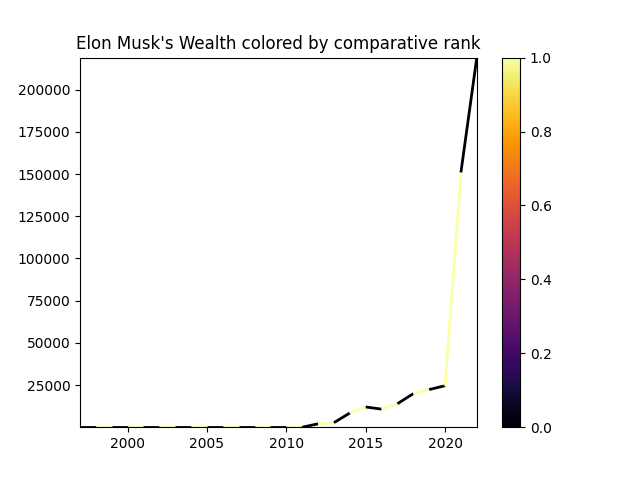

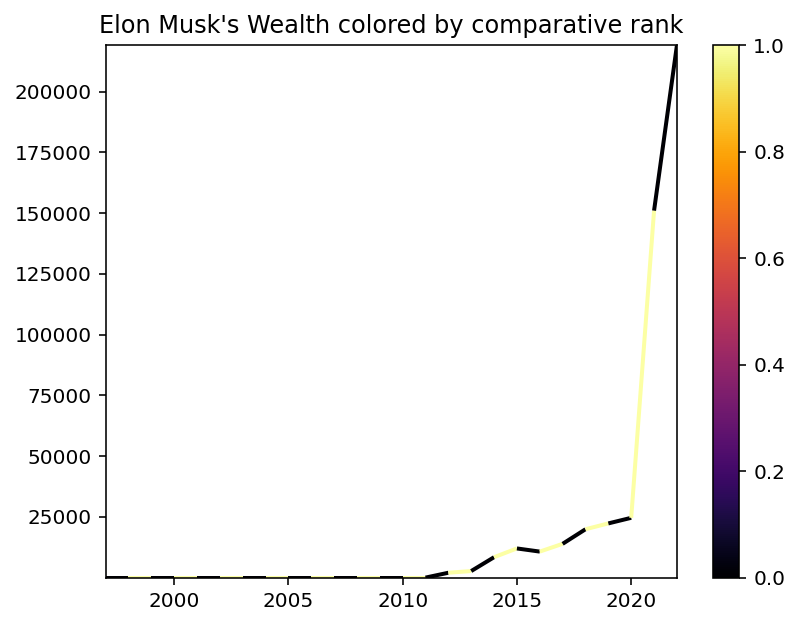

In [47]:

from pyforbes import ForbesList
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
flist = ForbesList()
richest400_df = flist.get_df("billionaires", year =2022)

#for the billionaire wealth/rank plot
import matplotlib
from matplotlib.collections import LineCollection
import matplotlib.colors as co
import matplotlib.cm as cm
#we will use this function on every loaded dataset to have consistent names in each dataFrame 

def uri_to_name(data):
    lst = []
    for index, row in data.iterrows():
        lst.append(row['person']["name"])
    data.name = pd.Series(lst)
uri_to_name(richest400_df)
richest400_df.head()
n = list(richest400_df.name)

select = pn.widgets.Select(name='Shape', options = n)

select

def get_rank_wealth(name,year): #gives the rank and the wealth of the billionaire a certain year
    df = flist.get_df("billionaires", year =year)
    uri_to_name(df)
    
    if name in df.name.values:
        num_billionaires = df.shape[0]
                #this is the min max scaling of the rank of each billionaire by year
                #max+1               -  value                                         - min / max - min
        rank = ((num_billionaires+1) - int(df[df.name == name].finalWorth.index[0]+1) - 1)/(num_billionaires - 1)
        
        wealth = int(df[df.name == name].finalWorth.values[0])
        return rank,wealth
    else:#if the name isnt in this year returns rank 0 and wealth 0
        return 0,0

#Called rank_ column isntead of rank, it caused a weird bug
def list_of_wealth(name,start=1997,stop=2022):
    rank_wealth = pd.DataFrame(columns=["rank_","wealth"])

    for year in range(start,stop+1):
        
        rank,wealth = get_rank_wealth(name,year)
        #print(year,rank,wealth)
        #rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth,"year":year},ignore_index=True)
        rank_wealth = rank_wealth.append({"rank_":rank,"wealth":wealth},ignore_index=True)

    return rank_wealth

# bil=list_of_wealth(select.value)
# bil

# billion = bil.hvplot(x = 'year', y = 'wealth', title="Number of billionaires per year")

def color_map_color(value, cmap_name='inferno', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

def make_plot(tri):
    bil=list_of_wealth(tri)
    bil
    print(tri)
    print(bil.rank)
    fig, ax = plt.subplots()
    y,r = bil.wealth.values,bil.rank_.values
    x = np.arange(1997,2023)


    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors

    #lc = LineCollection(segments, cmap='prism',colors = cm.hot(list(r)))
    #c = list(map(color_map_color,r))
    lc = LineCollection(segments, cmap='inferno')
    # Set the values used for colormapping
    lc.set_array([0,1])
    lc.set_linewidth(2)
    lc.set_label('Line Number')
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)


    name = tri
    ax.set_title(f"{name}'s Wealth colored by comparative rank")

    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(1, y.max())

    return fig
    #plt.show()

mpl_pane = pn.pane.Matplotlib(make_plot(select.value), dpi=144)
#     print(t.new)
#     bil=list_of_wealth(t.new)
#     # make_plot(t.new)
#     # template.main[3] = pn.pane.Matplotlib(make_plot(select.value), dpi=144)
#     template.main[3] = pn.Row(bil.hvplot(x = 'year', y = 'wealth', title="Number of billionaires per year"))

# select.link(billion, callbacks={'value': update})
#select.param.watch(update, 'value')ib(make_plot(select.value), dpi=144)
mpl_pane

# def update(t):
#     print(t.new)
#     bil=list_of_wealth(t.new)
#     # make_plot(t.new)
#     # template.main[3] = pn.pane.Matplotlib(make_plot(select.value), dpi=144)
#     template.main[3] = pn.Row(bil.hvplot(x = 'year', y = 'wealth', title="Number of billionaires per year"))

# select.link(billion, callbacks={'value': update})
#select.param.watch(update, 'value')

Creating the Dashboard (Not finished!)

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2801664687360] Row(sizing_mode='stretch_width')
        [0] Column(margin=(0, 25), sizing_mode='stretch_width')
            [0] ParamFunction(function, width=700)
    [2801673780528] Row(sizing_mode='stretch_width')
        [0] Column(margin=(0, 25), sizing_mode='stretch_width')
            [0] ParamFunction(function, width=700)
    [2801681155936] Row(sizing_mode='stretch_width')
        [0] Column(height=500, sizing_mode='stretch_both')
            [0] IntSlider(end=2022, name='Year count', sizing_mode='stretch_width', start=1997, value=2000)
            [1] Folium(Map, margin=0, min_height=500, sizing_mode='stretch_both')
    [2801694503648] Row(sizing_mode='stretch_width')
        [0] Matplotlib(Figure, height=345, sizing_mode='stretch_width', width=460)
    [2801693984848] Markdown(str, sizing_mode='stretch_width')
    [2801624923056] IntSlider(end=2022, name='Year slider', start=1997, value=2000)
    [2801673779232] Select(name='Shape', options=['Elon Musk', ...], sizing_mode='stretch_width', value='Elon Musk')
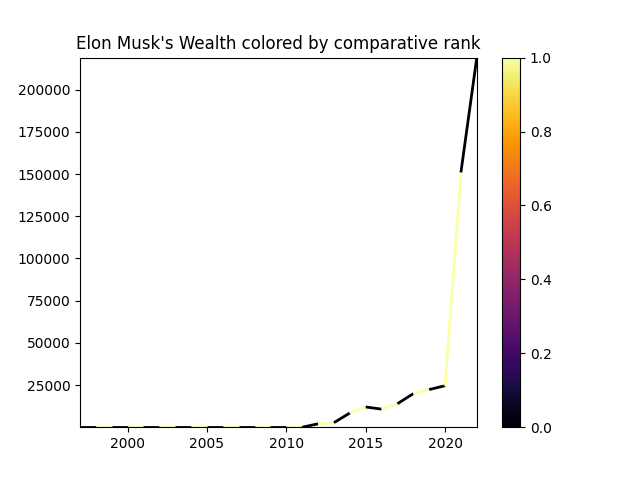

In [48]:
template = pn.template.FastListTemplate(
    title='Forbes Billionaires Data Visualizations', 
    sidebar=[pn.pane.Markdown("## Settings"),   
             year_slider,
             select],
    main=[pn.Row(pn.Column(total_billionaire_plot.panel(width=700), margin=(0,25))),
                pn.Row(pn.Column(worth_bar_plot.panel(width=700), margin=(0,25))),
         pn.Row(myapp.view),
         pn.Row(mpl_pane)],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable()